In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv")
df.head(30)

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
5,0xbe4e,Single-family home,1185,3.0,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49,82.94
6,0xe2a,Single-family home,1779,3.0,3,Semi_Furnished,0.0,No,Once in a day - Evening,7.43,NaN,Medium,100.0,2.90,74.88
7,0x2ea5,Duplex,1281,5.0,2,Semi_Furnished,3.0,No,All time,7.72,Well above average,Medium,143.0,0.96,28.54
8,0x7a83,Apartment,268,1.0,3,Semi_Furnished,1.0,No,All time,6.13,Well below average,NaN,94.0,4.17,88.11
9,0xb0fb,Apartment,159,2.0,2,Semi_Furnished,0.0,Yes,Once in a day - Morning,6.77,Well below average,Medium,90.0,4.48,80.65


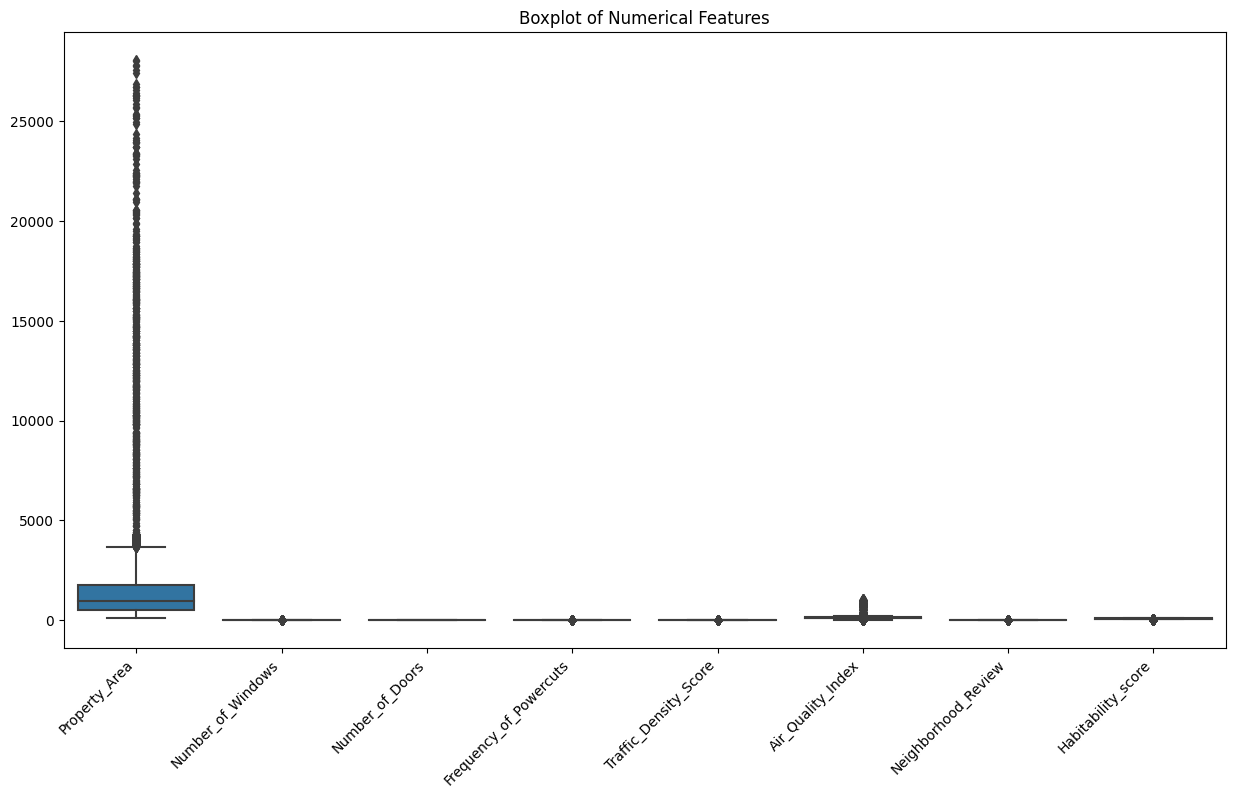

In [3]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.show()

# Handling the missing values

In [4]:
missing_values_count=df.isnull().sum()
print(missing_values_count)

Id                           0
Property_Type                0
Property_Area                0
Number_of_Windows         1333
Number_of_Doors              0
Furnishing                 828
Frequency_of_Powercuts    1109
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 629
Dust_and_Noise             999
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64


**Remove missing values(30%)**

In [5]:
total_entries=df.shape[0]
percentage_missing=(missing_values_count/total_entries)*100
columns_with_high_missing = percentage_missing[percentage_missing >30].index
print("Columns with more than 50% missing values:")

Columns with more than 50% missing values:


Filling missing values

In [6]:
categorical_df = df.select_dtypes(include=['object'])
numeric_df = df.select_dtypes(exclude=['object'])
categorical_df_filled = categorical_df.apply(lambda x: x.fillna(x.mode()[0]))
numeric_df_filled = numeric_df.apply(lambda x: x.fillna(x.median()))

In [7]:
df = pd.concat([numeric_df_filled, categorical_df_filled], axis=1)
df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,106,4.0,1,0.0,5.89,90.0,3.86,71.98,0x21e3,Apartment,Semi_Furnished,No,Once in a day - Morning,Slightly below average,Medium
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20,0x68d4,Apartment,Unfurnished,No,Once in a day - Evening,Well below average,Medium
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39,0x7d81,Apartment,Fully Furnished,No,Once in a day - Morning,Slightly below average,Medium
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46,0x7a57,Apartment,Unfurnished,Yes,Once in a day - Morning,Well above average,Medium
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70,0x9409,Bungalow,Fully Furnished,No,All time,Well below average,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.0,1,0.0,7.80,149.0,4.72,73.12,0x4dbe,Apartment,Semi_Furnished,No,All time,Well below average,Medium
31595,315,1.0,1,0.0,5.92,82.0,4.50,95.40,0x41b3,Container Home,Fully Furnished,Yes,Once in a day - Morning,Well below average,Medium
31596,480,6.0,3,0.0,5.68,80.0,3.88,81.29,0x8531,Duplex,Semi_Furnished,No,Once in two days,Well below average,Medium
31597,642,1.0,2,1.0,7.09,162.0,3.76,82.80,0x2537,Apartment,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium


# Feature Encoding

In [8]:
categorical_df

,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,0x21e3,Apartment,Semi_Furnished,No,Once in a day - Morning,Slightly below average,Medium
1,0x68d4,Apartment,Unfurnished,No,Once in a day - Evening,Well below average,Medium
2,0x7d81,Apartment,Fully Furnished,No,Once in a day - Morning,Slightly below average,Medium
3,0x7a57,Apartment,Unfurnished,Yes,Once in a day - Morning,Well above average,Medium
4,0x9409,Bungalow,Fully Furnished,No,All time,Well below average,Medium
...,...,...,...,...,...,...,...
31594,0x4dbe,Apartment,Semi_Furnished,No,All time,Well below average,Medium
31595,0x41b3,Container Home,Fully Furnished,Yes,Once in a day - Morning,Well below average,Medium
31596,0x8531,Duplex,Semi_Furnished,No,Once in two days,Well below average,Medium
31597,0x2537,Apartment,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium


In [9]:
# Furnishing- lable encoding
unique_furnishing=df['Furnishing'].unique()
print(unique_furnishing)
#'Semi_Furnished-1', 'Unfurnished-0', 'Fully Furnished-2'

# Mapping dictionary;
mapping = {'Semi_Furnished':1, 'Unfurnished':0, 'Fully Furnished':2 }

df["Furnishing"] = df["Furnishing"].map(mapping)

df.rename(columns={"Furnishing": "Furnishing"}, inplace=True)

print(df["Furnishing"])

['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
0        1
1        0
2        2
3        0
4        2
        ..
31594    1
31595    2
31596    1
31597    1
31598    1
Name: Furnishing, Length: 31599, dtype: int64


**Feature Encoding**

In [10]:
unique_property_type=df['Property_Type'].unique()
print(unique_property_type)

['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']


In [11]:
# Property_Type- lable encoding
#''Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867' 'Container Home'

# Mapping dictionary;
mapping = {'Apartment':1, 'Bungalow':2, 'Single-family home':3, 'Duplex':4, '#R%$G&867':5,'Container Home':6}

df["Property_Type"] = df["Property_Type"].map(mapping)

df.rename(columns={"Property_Type": "Property_Type"}, inplace=True)

print(df["Property_Type"])

0        1
1        1
2        1
3        1
4        2
        ..
31594    1
31595    6
31596    4
31597    1
31598    3
Name: Property_Type, Length: 31599, dtype: int64


In [12]:
unique_power_backup=df['Power_Backup'].unique()
print(unique_power_backup)

# Power_Backup- lable encoding
#binary values 0 or 1

# Mapping dictionary;
mapping = {'No':0,'Yes':1,'NOT MENTIONED':0}

df["Power_Backup"] = df["Power_Backup"].map(mapping)

df.rename(columns={"Power_Backup": "Power_Backup"}, inplace=True)

print(df["Power_Backup"])

['No' 'Yes' 'NOT MENTIONED']
0        0
1        0
2        0
3        1
4        0
        ..
31594    0
31595    1
31596    0
31597    0
31598    0
Name: Power_Backup, Length: 31599, dtype: int64


In [13]:
# Water_Supply- lable encoding
unique_water_supply=df['Water_Supply'].unique()
print(unique_water_supply)

#Once in a day - Morning  -3 Once in a day - Evening  -2 All time- 4 NOT MENTIONED -0 Once in two days -1

# Mapping dictionary
mapping = {"Once in a day - Morning": 3, "Once in a day - Evening": 2,"All time": 4, "Once in two days": 1, "NOT MENTIONED":0 }

df["Water_Supply"] = df["Water_Supply"].map(mapping)
df.rename(columns={"Water_Supply": "Water_Supply"}, inplace=True)

print(df["Water_Supply"])

['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
0        3
1        2
2        3
3        3
4        4
        ..
31594    4
31595    3
31596    1
31597    3
31598    2
Name: Water_Supply, Length: 31599, dtype: int64


In [14]:
# Crime_Rate- lable encoding
unique_crime_rate=df['Crime_Rate'].unique()
print(unique_water_supply)

# Mapping dictionary
mapping = {'Slightly below average':3, 'Well below average':4,'Well above average':1, 'Slightly above average':2}

df["Crime_Rate"] = df["Crime_Rate"].map(mapping)
df.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)

print(df["Crime_Rate"])

['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
0        3
1        4
2        3
3        1
4        4
        ..
31594    4
31595    4
31596    4
31597    4
31598    4
Name: Crime_Rate, Length: 31599, dtype: int64


In [15]:
# Dust_and_Noise- lable encoding
unique_dust_and_noise=df['Dust_and_Noise'].unique()
print(unique_dust_and_noise)

# Mapping dictionary
mapping = {'Medium':2, 'High':1, 'Low':3}

df["Dust_and_Noise"] = df["Dust_and_Noise"].map(mapping)
df.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)

print(df["Dust_and_Noise"])

['Medium' 'High' 'Low']
0        2
1        2
2        2
3        2
4        2
        ..
31594    2
31595    2
31596    2
31597    2
31598    2
Name: Dust_and_Noise, Length: 31599, dtype: int64


In [16]:
df.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,106,4.0,1,0.0,5.89,90.0,3.86,71.98,0x21e3,1,1,0,3,3,2
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20,0x68d4,1,0,0,2,4,2
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39,0x7d81,1,2,0,3,3,2
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46,0x7a57,1,0,1,3,1,2
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70,0x9409,2,2,0,4,4,2


                        Property_Area  Number_of_Windows  Number_of_Doors  \
Property_Area                1.000000           0.259347         0.217901   
Number_of_Windows            0.259347           1.000000         0.389537   
Number_of_Doors              0.217901           0.389537         1.000000   
Frequency_of_Powercuts      -0.000303          -0.007482        -0.002999   
Traffic_Density_Score        0.003493           0.000010        -0.002226   
Air_Quality_Index            0.000174           0.002666         0.001370   
Neighborhood_Review          0.014429           0.009140        -0.000697   
Habitability_score           0.066577           0.096664         0.075017   
Property_Type                0.023263           0.037676        -0.096447   
Furnishing                  -0.007548          -0.005766        -0.003304   
Power_Backup                 0.007223           0.004314         0.007353   
Water_Supply                 0.009227           0.009671        -0.001811   

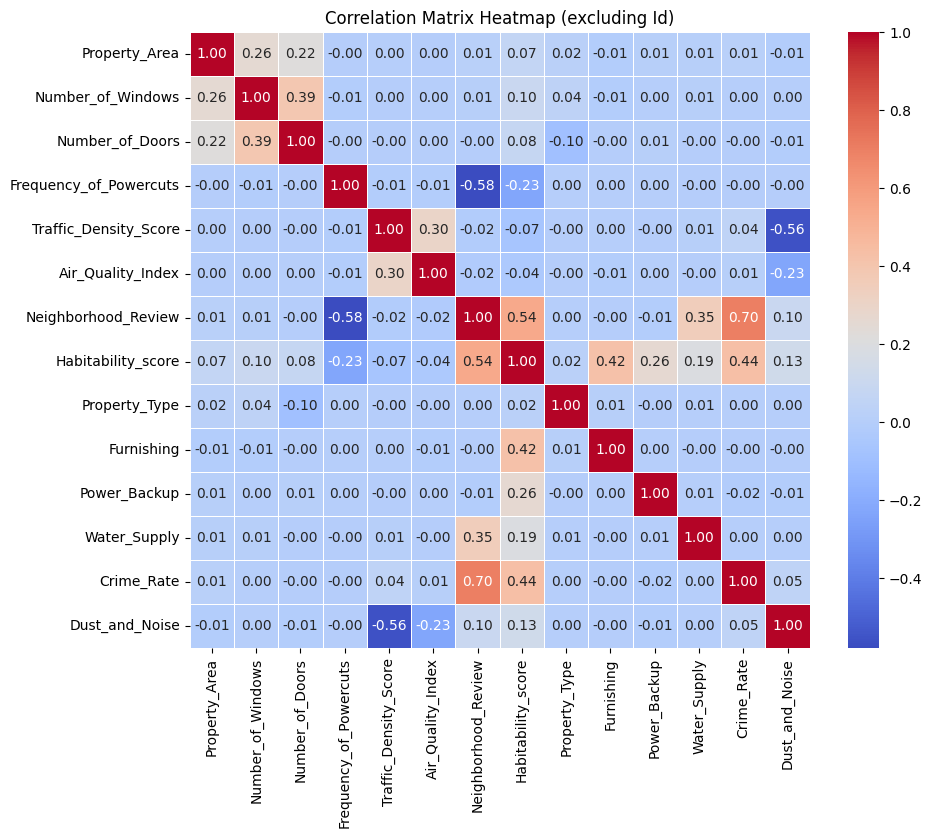

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.drop('Id', axis=1).corr()

print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (excluding Id)')
plt.show()


In [18]:
df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,106,4.0,1,0.0,5.89,90.0,3.86,71.98,0x21e3,1,1,0,3,3,2
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20,0x68d4,1,0,0,2,4,2
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39,0x7d81,1,2,0,3,3,2
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46,0x7a57,1,0,1,3,1,2
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70,0x9409,2,2,0,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,851,4.0,1,0.0,7.80,149.0,4.72,73.12,0x4dbe,1,1,0,4,4,2
31595,315,1.0,1,0.0,5.92,82.0,4.50,95.40,0x41b3,6,2,1,3,4,2
31596,480,6.0,3,0.0,5.68,80.0,3.88,81.29,0x8531,4,1,0,1,4,2
31597,642,1.0,2,1.0,7.09,162.0,3.76,82.80,0x2537,1,1,0,3,4,2


In [19]:
df=df.drop('Id',axis=1)

# Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
# numerical_columns = numerical_columns.apply(pd.to_numeric, errors='coerce')
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [21]:
new_df=scaled_df
new_df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,0.000215,0.266667,0.0,0.000000,0.594349,0.086207,0.760504,0.697800,0.0,0.5,0.0,0.75,0.666667,0.5
1,0.022636,0.133333,0.2,0.333333,0.440969,0.091954,0.695378,0.689387,0.0,0.0,0.0,0.50,1.000000,0.5
2,0.022779,0.266667,0.2,0.000000,0.751766,0.115900,0.750000,0.691437,0.0,1.0,0.0,0.75,0.666667,0.5
3,0.028608,0.200000,0.2,0.666667,0.621594,0.095785,0.231092,0.260785,0.0,0.0,1.0,0.75,0.000000,0.5
4,0.076455,0.933333,1.0,0.000000,0.550959,0.111111,0.951681,0.932053,0.2,1.0,0.0,1.00,1.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,0.026856,0.266667,0.0,0.000000,0.787084,0.142720,0.941176,0.710095,0.0,0.5,0.0,1.00,1.000000,0.5
31595,0.007688,0.066667,0.0,0.000000,0.597376,0.078544,0.894958,0.950388,1.0,1.0,1.0,0.75,1.000000,0.5
31596,0.013589,0.400000,0.4,0.000000,0.573158,0.076628,0.764706,0.798210,0.6,0.5,0.0,0.25,1.000000,0.5
31597,0.019382,0.066667,0.2,0.333333,0.715439,0.155172,0.739496,0.814495,0.0,0.5,0.0,0.75,1.000000,0.5


# Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# X = new_df.drop(['Habitability_score'], axis=1)
X = new_df.drop(['Habitability_score'], axis=1)
y = new_df['Habitability_score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.009719404294475889
R-squared (R2): 0.560575017569068


# Testing data

In [23]:
df_test=pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv")
df_test

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6808,Single-family home,1521,5.0,1,Unfurnished,0.0,No,All time,7.61,Well below average,Medium,156.0,4.71
1,0x6a98,Single-family home,2233,2.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.28,Well below average,Medium,82.0,4.50
2,0xacc0,Apartment,986,1.0,1,Unfurnished,0.0,No,All time,7.72,Well below average,Medium,91.0,4.79
3,0x8225,Single-family home,1625,2.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,6.19,Well below average,Medium,159.0,4.09
4,0xaee8,Single-family home,1166,2.0,2,Fully Furnished,0.0,No,Once in a day - Evening,5.84,Slightly below average,Medium,82.0,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0x6e26,Single-family home,1120,3.0,2,NaN,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56
7896,0xa013,Apartment,445,1.0,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93
7897,0x9721,Bungalow,3780,6.0,6,Unfurnished,0.0,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80
7898,0x7e25,Single-family home,1266,3.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88.0,3.25


In [24]:
missing_values_count=df_test.isnull().sum()
print(missing_values_count)

Id                          0
Property_Type               0
Property_Area               0
Number_of_Windows         321
Number_of_Doors             0
Furnishing                214
Frequency_of_Powercuts    274
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                158
Dust_and_Noise            220
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64


In [25]:
total_entries=df_test.shape[0]
percentage_missing=(missing_values_count/total_entries)*100
columns_with_high_missing = percentage_missing[percentage_missing >30].index
# print("Columns with more than 50% missing values:")

filling missing values


In [26]:
categorical_df_test = df_test.select_dtypes(include=['object'])
numeric_df_test = df_test.select_dtypes(exclude=['object'])
categorical_df_filled_test = categorical_df_test.apply(lambda x: x.fillna(x.mode()[0]))
numeric_df_filled_test = numeric_df_test.apply(lambda x: x.fillna(x.median()))

In [27]:
df_test = pd.concat([numeric_df_filled_test, categorical_df_filled_test], axis=1)
df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,1521,5.0,1,0.0,7.61,156.0,4.71,0x6808,Single-family home,Unfurnished,No,All time,Well below average,Medium
1,2233,2.0,1,0.0,5.28,82.0,4.50,0x6a98,Single-family home,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium
2,986,1.0,1,0.0,7.72,91.0,4.79,0xacc0,Apartment,Unfurnished,No,All time,Well below average,Medium
3,1625,2.0,1,0.0,6.19,159.0,4.09,0x8225,Single-family home,Semi_Furnished,No,Once in a day - Evening,Well below average,Medium
4,1166,2.0,2,0.0,5.84,82.0,3.56,0xaee8,Single-family home,Fully Furnished,No,Once in a day - Evening,Slightly below average,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,0x6e26,Single-family home,Semi_Furnished,No,All time,Slightly above average,Medium
7896,445,1.0,3,1.0,5.70,86.0,2.93,0xa013,Apartment,Fully Furnished,No,All time,Slightly above average,Medium
7897,3780,6.0,6,0.0,6.84,137.0,3.80,0x9721,Bungalow,Unfurnished,Yes,Once in two days,Well below average,Medium
7898,1266,3.0,1,0.0,4.60,88.0,3.25,0x7e25,Single-family home,Semi_Furnished,No,Once in a day - Morning,Slightly above average,Medium


# Feature Encoding

In [28]:
categorical_df_test

,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,0x6808,Single-family home,Unfurnished,No,All time,Well below average,Medium
1,0x6a98,Single-family home,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium
2,0xacc0,Apartment,Unfurnished,No,All time,Well below average,Medium
3,0x8225,Single-family home,Semi_Furnished,No,Once in a day - Evening,Well below average,Medium
4,0xaee8,Single-family home,Fully Furnished,No,Once in a day - Evening,Slightly below average,Medium
...,...,...,...,...,...,...,...
7895,0x6e26,Single-family home,NaN,No,All time,Slightly above average,Medium
7896,0xa013,Apartment,Fully Furnished,No,All time,Slightly above average,Medium
7897,0x9721,Bungalow,Unfurnished,Yes,Once in two days,Well below average,Medium
7898,0x7e25,Single-family home,Semi_Furnished,No,Once in a day - Morning,Slightly above average,NaN


In [29]:
# Furnishing- lable encoding
unique_furnishing=df_test['Furnishing'].unique()
print(unique_furnishing)
#'Semi_Furnished-1', 'Unfurnished-0', 'Fully Furnished-2'

# Mapping dictionary;
mapping = {'Semi_Furnished':1, 'Unfurnished':0, 'Fully Furnished':2 }

df_test["Furnishing"] = df_test["Furnishing"].map(mapping)

df_test.rename(columns={"Furnishing": "Furnishing"}, inplace=True)

print(df_test["Furnishing"])

['Unfurnished' 'Semi_Furnished' 'Fully Furnished']
0       0
1       1
2       0
3       1
4       2
       ..
7895    1
7896    2
7897    0
7898    1
7899    2
Name: Furnishing, Length: 7900, dtype: int64


In [30]:
unique_property_type=df['Property_Type'].unique()
print(unique_property_type)

# Mapping dictionary;
mapping = {'Apartment':1, 'Bungalow':2, 'Single-family home':3, 'Duplex':4, '#R%$G&867':5,'Container Home':6}

df_test["Property_Type"] = df_test["Property_Type"].map(mapping)

df_test.rename(columns={"Property_Type": "Property_Type"}, inplace=True)

print(df_test["Property_Type"])

[1 2 3 4 5 6]
0       3
1       3
2       1
3       3
4       3
       ..
7895    3
7896    1
7897    2
7898    3
7899    3
Name: Property_Type, Length: 7900, dtype: int64


In [31]:
unique_power_backup=df_test['Power_Backup'].unique()
print(unique_power_backup)

# Power_Backup- lable encoding
#binary values 0 or 1

# Mapping dictionary;
mapping = {'No':0,'Yes':1,'NOT MENTIONED':0}

df_test["Power_Backup"] = df_test["Power_Backup"].map(mapping)

df_test.rename(columns={"Power_Backup": "Power_Backup"}, inplace=True)

print(df_test["Power_Backup"])

['No' 'Yes' 'NOT MENTIONED']
0       0
1       0
2       0
3       0
4       0
       ..
7895    0
7896    0
7897    1
7898    0
7899    0
Name: Power_Backup, Length: 7900, dtype: int64


In [32]:
# Water_Supply- lable encoding
unique_water_supply=df_test['Water_Supply'].unique()
print(unique_water_supply)

#Once in a day - Morning  -3 Once in a day - Evening  -2 All time- 4 NOT MENTIONED -0 Once in two days -1

# Mapping dictionary
mapping = {"Once in a day - Morning": 3, "Once in a day - Evening": 2,"All time": 4, "Once in two days": 1, "NOT MENTIONED":0 }

df_test["Water_Supply"] = df_test["Water_Supply"].map(mapping)
df_test.rename(columns={"Water_Supply": "Water_Supply"}, inplace=True)

print(df_test["Water_Supply"])

['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']
0       4
1       3
2       4
3       2
4       2
       ..
7895    4
7896    4
7897    1
7898    3
7899    4
Name: Water_Supply, Length: 7900, dtype: int64


In [33]:
# Crime_Rate- lable encoding
unique_crime_rate=df_test['Crime_Rate'].unique()
print(unique_water_supply)

# Mapping dictionary
mapping = {'Slightly below average':3, 'Well below average':4,'Well above average':1, 'Slightly above average':2}

df_test["Crime_Rate"] = df_test["Crime_Rate"].map(mapping)
df_test.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)
print(df_test["Crime_Rate"])

['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']
0       4
1       4
2       4
3       4
4       3
       ..
7895    2
7896    2
7897    4
7898    2
7899    4
Name: Crime_Rate, Length: 7900, dtype: int64


In [34]:
# Dust_and_Noise- lable encoding
unique_dust_and_noise=df_test['Dust_and_Noise'].unique()
print(unique_dust_and_noise)

# Mapping dictionary
mapping = {'Medium':2, 'High':1, 'Low':3}

df_test["Dust_and_Noise"] = df_test["Dust_and_Noise"].map(mapping)
df_test.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)

print(df_test["Dust_and_Noise"])

['Medium' 'Low' 'High']
0       2
1       2
2       2
3       2
4       2
       ..
7895    2
7896    2
7897    2
7898    2
7899    1
Name: Dust_and_Noise, Length: 7900, dtype: int64


In [35]:
df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,1521,5.0,1,0.0,7.61,156.0,4.71,0x6808,3,0,0,4,4,2
1,2233,2.0,1,0.0,5.28,82.0,4.50,0x6a98,3,1,0,3,4,2
2,986,1.0,1,0.0,7.72,91.0,4.79,0xacc0,1,0,0,4,4,2
3,1625,2.0,1,0.0,6.19,159.0,4.09,0x8225,3,1,0,2,4,2
4,1166,2.0,2,0.0,5.84,82.0,3.56,0xaee8,3,2,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,0x6e26,3,1,0,4,2,2
7896,445,1.0,3,1.0,5.70,86.0,2.93,0xa013,1,2,0,4,2,2
7897,3780,6.0,6,0.0,6.84,137.0,3.80,0x9721,2,0,1,1,4,2
7898,1266,3.0,1,0.0,4.60,88.0,3.25,0x7e25,3,1,0,3,2,2


In [36]:
id_dataframe = df_test[['Id']].copy()
df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,1521,5.0,1,0.0,7.61,156.0,4.71,0x6808,3,0,0,4,4,2
1,2233,2.0,1,0.0,5.28,82.0,4.50,0x6a98,3,1,0,3,4,2
2,986,1.0,1,0.0,7.72,91.0,4.79,0xacc0,1,0,0,4,4,2
3,1625,2.0,1,0.0,6.19,159.0,4.09,0x8225,3,1,0,2,4,2
4,1166,2.0,2,0.0,5.84,82.0,3.56,0xaee8,3,2,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,0x6e26,3,1,0,4,2,2
7896,445,1.0,3,1.0,5.70,86.0,2.93,0xa013,1,2,0,4,2,2
7897,3780,6.0,6,0.0,6.84,137.0,3.80,0x9721,2,0,1,1,4,2
7898,1266,3.0,1,0.0,4.60,88.0,3.25,0x7e25,3,1,0,3,2,2


In [37]:
df_test=df_test.drop('Id',axis=1)
df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,1521,5.0,1,0.0,7.61,156.0,4.71,3,0,0,4,4,2
1,2233,2.0,1,0.0,5.28,82.0,4.50,3,1,0,3,4,2
2,986,1.0,1,0.0,7.72,91.0,4.79,1,0,0,4,4,2
3,1625,2.0,1,0.0,6.19,159.0,4.09,3,1,0,2,4,2
4,1166,2.0,2,0.0,5.84,82.0,3.56,3,2,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,3,1,0,4,2,2
7896,445,1.0,3,1.0,5.70,86.0,2.93,1,2,0,4,2,2
7897,3780,6.0,6,0.0,6.84,137.0,3.80,2,0,1,1,4,2
7898,1266,3.0,1,0.0,4.60,88.0,3.25,3,1,0,3,2,2


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data_test = scaler.fit_transform(df_test)

scaled_df_test= pd.DataFrame(scaled_data_test, columns=df_test.columns)

In [39]:
new_df_test=scaled_df_test
new_df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,0.050828,0.333333,0.0,0.000000,0.741400,0.156,0.942,0.4,0.0,0.0,1.00,1.000000,0.5
1,0.076296,0.133333,0.0,0.000000,0.465006,0.082,0.900,0.4,0.5,0.0,0.75,1.000000,0.5
2,0.031692,0.066667,0.0,0.000000,0.754448,0.091,0.958,0.0,0.0,0.0,1.00,1.000000,0.5
3,0.054548,0.133333,0.0,0.000000,0.572954,0.159,0.818,0.4,0.5,0.0,0.50,1.000000,0.5
4,0.038130,0.133333,0.2,0.000000,0.531435,0.082,0.712,0.4,1.0,0.0,0.50,0.666667,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0.036485,0.200000,0.2,0.000000,0.497034,0.080,0.712,0.4,0.5,0.0,1.00,0.333333,0.5
7896,0.012340,0.066667,0.4,0.333333,0.514828,0.086,0.586,0.0,1.0,0.0,1.00,0.333333,0.5
7897,0.131631,0.400000,1.0,0.000000,0.650059,0.137,0.760,0.2,0.0,1.0,0.25,1.000000,0.5
7898,0.041707,0.200000,0.0,0.000000,0.384342,0.088,0.650,0.4,0.5,0.0,0.75,0.333333,0.5


In [40]:
X_test_data = new_df_test
# Make predictions on the test data
y_test_pred = model.predict(X_test_data)

predicted_results = pd.DataFrame({'Habitability_score': y_test_pred})
print(predicted_results)

      Habitability_score
0               0.699178
1               0.775262
2               0.687319
3               0.727827
4               0.768647
...                  ...
7895            0.667617
7896            0.710710
7897            0.745986
7898            0.634801
7899            0.864386

[7900 rows x 1 columns]


In [41]:
result_combined = pd.concat([id_dataframe, predicted_results], axis=1)

In [42]:
print(result_combined)

          Id  Habitability_score
0     0x6808            0.699178
1     0x6a98            0.775262
2     0xacc0            0.687319
3     0x8225            0.727827
4     0xaee8            0.768647
...      ...                 ...
7895  0x6e26            0.667617
7896  0xa013            0.710710
7897  0x9721            0.745986
7898  0x7e25            0.634801
7899  0x8cb4            0.864386

[7900 rows x 2 columns]


In [43]:
result_combined.to_csv('Sustainable_210257F.csv', index=False)